<a href="https://colab.research.google.com/github/IamSAL/DataSci/blob/master/iris_train_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Train Test Split**

In [0]:
import warnings

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore", category=DeprecationWarning)

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# logistic_reg
lgr = LogisticRegression(solver='liblinear', multi_class='auto')
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
score_lr = accuracy_score(y_test, y_pred)

# KNN
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
best_n = knn_gscv.best_params_['n_neighbors']


knn = KNeighborsClassifier(n_neighbors=best_n)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score_knn = accuracy_score(y_test, y_pred_knn)


print("logistic_regression:", score_lr)
print("KNN:", score_knn)


logistic_regression: 1.0
KNN: 0.9777777777777777


**KNN (n = 1 to 30) -> can you find, which ‘n’ provides the highest accuracy?**


In [0]:
current_score=0
high_score=0;
high_n=0
scores=[]

for i in range (1,31):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  score_knn = accuracy_score(y_test, y_pred_knn)
  scores.append(score_knn)
  if score_knn>current_score:
    high_score=score_knn
    high_n=i
    current_score=high_score

  print("n:",i,"Accuracy:",score_knn)
print("Highest score:",high_score,"while n:",high_n)  

  

n: 1 Accuracy: 0.9555555555555556
n: 2 Accuracy: 0.9555555555555556
n: 3 Accuracy: 0.9555555555555556
n: 4 Accuracy: 0.9555555555555556
n: 5 Accuracy: 0.9555555555555556
n: 6 Accuracy: 0.9555555555555556
n: 7 Accuracy: 0.9555555555555556
n: 8 Accuracy: 0.9555555555555556
n: 9 Accuracy: 0.9777777777777777
n: 10 Accuracy: 0.9555555555555556
n: 11 Accuracy: 0.9555555555555556
n: 12 Accuracy: 0.9333333333333333
n: 13 Accuracy: 0.9777777777777777
n: 14 Accuracy: 0.9555555555555556
n: 15 Accuracy: 0.9555555555555556
n: 16 Accuracy: 0.9777777777777777
n: 17 Accuracy: 0.9777777777777777
n: 18 Accuracy: 0.9555555555555556
n: 19 Accuracy: 0.9777777777777777
n: 20 Accuracy: 0.9333333333333333
n: 21 Accuracy: 0.9555555555555556
n: 22 Accuracy: 0.9333333333333333
n: 23 Accuracy: 0.9555555555555556
n: 24 Accuracy: 0.9555555555555556
n: 25 Accuracy: 0.9555555555555556
n: 26 Accuracy: 0.9777777777777777
n: 27 Accuracy: 0.9555555555555556
n: 28 Accuracy: 0.9333333333333333
n: 29 Accuracy: 0.93333333333

**Can you plot a simple graph, where K values (1-30) form your x-axis and accuracy score 0-1 form your y-axis?**

<function matplotlib.pyplot.show>

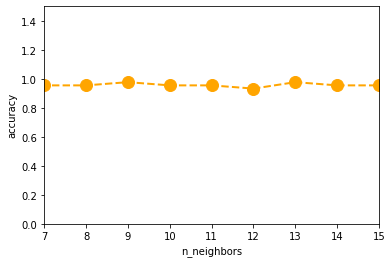

In [0]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,31),scores,color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")

plt.axis([7, 15, 0, 1.5])
plt.show